In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

import statsmodels.api as sm

from ISLP import load_data

from ISLP.models import (ModelSpec as MS,
                        summarize,
                        poly)


In [5]:
carseats_df = load_data('Carseats')

carseats_df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## a)

In [10]:
predictors = ['Price', 'Urban', 'US']

y = carseats_df['Sales']

X = MS(predictors).fit_transform(carseats_df)

result = sm.OLS(y, X).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 27 Dec 2023   Prob (F-statistic):           2.39e-23
Time:                        20:52:33   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban[Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## b)

we have an intercept of 13.
The price coefficient has a negative correlation with sales, if we increase the price in 100 dollars will decrease the sales by 5.

The Urban coefficient also has a negative correlation, if the store is in an urban are will decrease the sales by -0.02.

The US coefficient has a positive correlation, if the store is in the US will increase the sales by 1.

## c)

Sales = 13.04 + Price*-0.05 + Urban[yes] * -0.02 + US[yes] = 1.2


## d)

Based on the p-value, the coefficients that have significantly low p-value are: Intercept, Price and the US.

## e)

In [11]:
predictors = ['Price', 'US']

y = carseats_df['Sales']

X = MS(predictors).fit_transform(carseats_df)

result = sm.OLS(y, X).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Wed, 27 Dec 2023   Prob (F-statistic):           2.66e-24
Time:                        21:04:05   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US[Yes]        1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## f)

In terms of the R^2 (coefficient of determination), the models performance are poor and even, 0.239. However, since the second model uses less predictors, it's slightly better. Reenforcing that the R^2 is pretty low for the two models showing that they don't explain well the sales variation. 

## g)

In [15]:
# CI of the Intercept coefficient
int_coeff = 13.0308
int_std_error = 0.631

print(f"interval CI: [{int_coeff - 2 * int_std_error:.2f} : {int_coeff + 2 * int_std_error:.2f} ]")

# CI of the Intercept coefficient
price_coeff = -0.0545
price_std_error = 0.005

print(f"Price CI: [{price_coeff - 2*price_std_error:.2f} : {price_coeff + 2 * price_std_error:.2f} ]")

# CI of the Intercept coefficient
us_coeff = 1.1996
us_std_error = 0.258

print(f"us CI: [{us_coeff - 2*us_std_error:.2f} : {us_coeff + 2 * us_std_error:.2f} ]")


interval CI: [11.77 : 14.29 ]
Price CI: [-0.06 : -0.04 ]
us CI: [0.68 : 1.72 ]


## h)

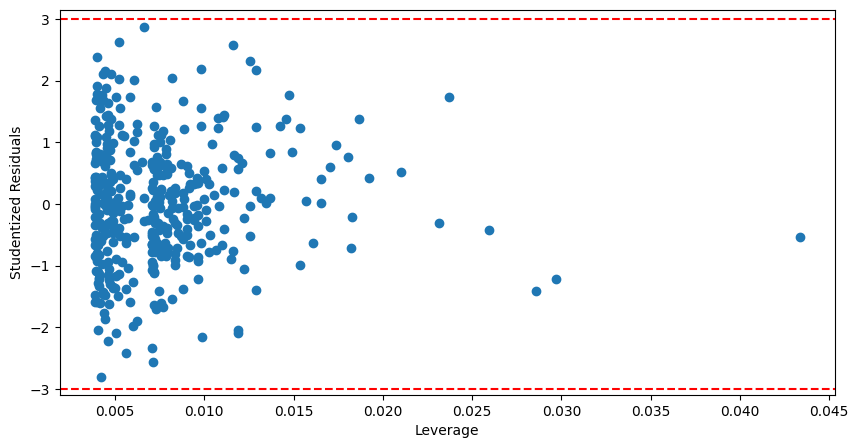

In [23]:
# Outliers and Leverage

ax = plt.subplots(figsize=(10,5))[1]
ax.scatter(result.get_influence().hat_matrix_diag, result.get_influence().resid_studentized_internal)
ax.set_xlabel('Leverage')
ax.set_ylabel('Studentized Residuals')

ax.axhline(y=3, color='red', linestyle='--', label='Constant Line')
ax.axhline(y=-3, color='red', linestyle='--', label='Constant Line')

plt.show()

In [28]:
leverage_threshold = (2 + 1)/400

observations_leverage = list(filter(lambda x: x > leverage_threshold, result.get_influence().hat_matrix_diag))

observations_leverage

[0.00900381325147304,
 0.009954182586743599,
 0.007927678163566097,
 0.012883253565466997,
 0.009223134375694341,
 0.008134188797157396,
 0.01109277640794653,
 0.014563108737375173,
 0.009636714963120768,
 0.011621598515609136,
 0.00983484950668469,
 0.007915294754593367,
 0.0076829162943803505,
 0.009636714963120768,
 0.007693530644928406,
 0.0433376570371785,
 0.013705237844542214,
 0.008183559828564134,
 0.012552881414885845,
 0.010080272568803235,
 0.011066240531576397,
 0.007927678163566097,
 0.00940509467080406,
 0.008044941464859033,
 0.00881742541257617,
 0.013705237844542214,
 0.009615486262024658,
 0.010288915672045994,
 0.007927678163566097,
 0.008845440402025659,
 0.007580184544432997,
 0.007589914365768714,
 0.008704966779928384,
 0.008239831755099257,
 0.008331149845708666,
 0.009636714963120768,
 0.009856962736993135,
 0.007580184544432997,
 0.009615486262024658,
 0.009119679721473782,
 0.0080582094030441,
 0.007927678163566097,
 0.007862257285931056,
 0.0104184134914586